Eleonora Pura - 17-732-678

In [38]:
import math
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.stats as sp
from scipy.special import factorial
import networkx.algorithms.community as nxacom
import powerlaw
import warnings
warnings.filterwarnings('ignore')

<h1>A05.1 Scale-Free Networks - Everyday networks are not Poisson: parameter estimation and model selection</h1>

Task: For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).

<p>1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error</p>
<p>2. Superimpose in the same plot of the power-law fit</p>
<p>(a) the Poisson and</p>
<p>(b) the exponential distribution with mean value equal to ⟨𝑘⟩.</p>

<p>Which distribution is more likely to describe the data?<p>


Calculating best minimal value for power law fit


graph_escort.gml
Power-law exponent 𝛾: 2.9544249080995764
Corresponding error: 0.07919729392592209


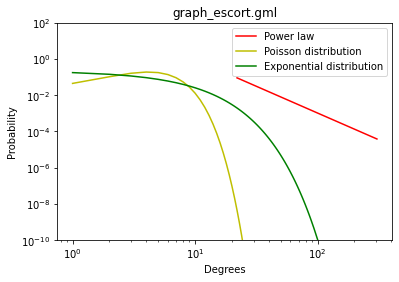

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_internet.gml
Power-law exponent 𝛾: 2.112191339113011
Corresponding error: 0.0366878070312722


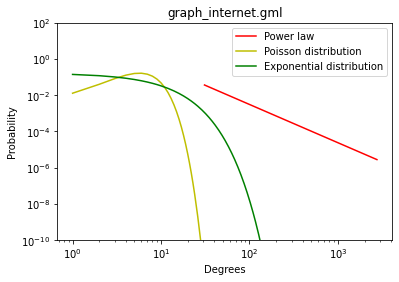

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_amazon.gml
Power-law exponent 𝛾: 4.065660034466614
Corresponding error: 0.09699319113242895


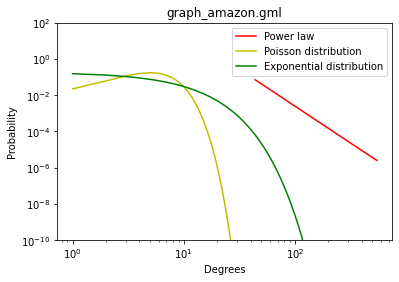

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_actors.gml
Power-law exponent 𝛾: 2.1609477665039183
Corresponding error: 0.003276703809865102


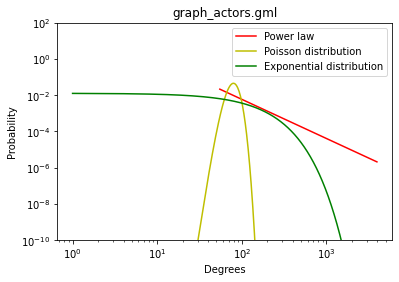

------------------------------------------
------------------------------------------


In [41]:
files = ["graph_escort.gml", "graph_internet.gml", "graph_amazon.gml","graph_actors.gml"]

for filename in files:
    g = nx.read_gml("data/" + filename)
    degrees = [degree for degree in dict(g.degree()).values()]
    avg_degree = np.average(degrees)

    fit = powerlaw.Fit(degrees)

    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    
    print(filename)
    print("Power-law exponent 𝛾: {}".format(alpha))
    print("Corresponding error: {}".format(sigma))

    exponential = []
    poisson = []

    for degree in sorted(set(degrees)):
        exponential.append((avg_degree**-1)*math.exp(-degree/avg_degree))
        poisson.append(((avg_degree**degree)/factorial(degree))*math.exp(-avg_degree))

    plt.title(filename)
    fit.power_law.plot_pdf(color='r', label="Power law")
    plt.plot(sorted(set(degrees)), poisson, color='y', label="Poisson distribution")
    plt.plot(sorted(set(degrees)), exponential, color='g', label="Exponential distribution")
    plt.ylim([10**-10,100])
    plt.xlabel("Degrees")
    plt.ylabel("Probability")

    plt.legend()
    plt.show()
    
    print("------------------------------------------")
    print("------------------------------------------")


<h1>A05.2 Barabási-Albert model</h1>

<p>Task: Build networks with the Barabási-Albert model. Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000, then compute some network properties. Compare them with randomised versions of the networks</p>
<p>1. Compute the average clustering coefficient, assortativity,average shortest path length and diameter</p>
<p>2. Compare them by scatterplots with the same measures on randomised versions of the networks (use log x axis)</p>
<p>3. Which of these measures is relatively unchanged by randomisation? Why?</p>

